In [564]:
# Import required libraries

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [565]:
# Collecting data

url_tv_strategy = "http://161.97.165.206:57895/services/tv_internal_strategy"
data = pd.read_json(url_tv_strategy)

# data.columns = [
#     'time', 
#     'open', 
#     'high', 
#     'low', 
#     'close', 
#     'volume', 
#     'close_time', 
#     'quote_asset_volume', 
#     'number_of_trades', 
#     'taker_buy_base_asset_volume', 
#     'taker_buy_quote_asset_volume', 
#     'unused'
# ]

# data['date'] = pd.to_datetime(df['time'], unit='ms')
data.tail(5)

,time,Supertrend_$time,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,Supertrend_indicator,SMA_30_$time,SMA_30_MA,SMA_30_Smoothing_Line,SMA_30_indicator,...,candle_min,candle_volume,candle_indicator,round,round_position,round_position_value,round_close_at,round_lock_price,round_close_price,round_noroundid
996,1668357360,1668357360,278.15,277.65549,1.000000e+100,Supertrend,1668357360,278.280000,278.296000,SMA_30,...,278.0,85.94,candle,120214,Bear,0,2022-11-13 16:40:57,278.26210456,278.12867375,
997,1668357000,1668357000,278.85,277.65549,1.000000e+100,Supertrend,1668357000,278.303333,278.304000,SMA_30,...,278.6,466.01,candle,120213,Bear,0,2022-11-13 16:35:51,279.04548075,278.26210456,
998,1668356640,1668356640,278.25,277.65549,1.000000e+100,Supertrend,1668356640,278.303333,278.298000,SMA_30,...,277.8,170.84,candle,120212,Bull,1,2022-11-13 16:30:42,278.09887412,279.04548075,
999,1668356460,1668356460,278.20,277.65549,1.000000e+100,Supertrend,1668356460,278.300000,278.288000,SMA_30,...,277.6,410.26,candle,120211,Bear,0,2022-11-13 16:25:36,278.34645918,278.09887412,
1000,1668356100,1668356100,278.30,277.65549,1.000000e+100,Supertrend,1668356100,278.296667,278.230667,SMA_30,...,278.2,119.60,candle,120210,Bear,0,2022-11-13 16:20:30,278.4,278.34645918,


In [566]:
# Remove unused columns
data.drop([
    'time',
    'Supertrend_$time',
    'Supertrend_indicator',
    'SMA_30_$time',
    'SMA_30_indicator',
    'SMA_50_$time',
    'SMA_50_indicator',
    'SMA_100_$time',
    'SMA_100_indicator',
    'SMA_200_$time',
    'SMA_200_indicator',
    'EMA_30_$time',
    'EMA_30_indicator',
    'EMA_50_$time',
    'EMA_50_indicator',
    'EMA_100_$time',
    'EMA_100_indicator',
    'EMA_200_$time',
    'EMA_200_indicator',
    'RSI_$time',
    'RSI_indicator',
    'RSI_Upper_Bollinger_Band',
    'RSI_Lower_Bollinger_Band',
    'RSI_fill_1_colorer',
    'Stochastic_$time',
    'Stochastic_indicator',
    'Bollinger_Bands_$time',
    'Bollinger_Bands_indicator',
    'ATR_$time',
    'ATR_indicator',
    'candle_time',
    'candle_indicator',
    'round',
    'round_position',
    'round_close_at',
    'round_lock_price',
    'round_close_price'], axis=1, inplace=True)

data.tail(5)

,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,SMA_30_MA,SMA_30_Smoothing_Line,SMA_50_MA,SMA_50_Smoothing_Line,SMA_100_MA,SMA_100_Smoothing_Line,SMA_200_MA,...,Bollinger_Bands_Upper,Bollinger_Bands_Lower,ATR_ATR,candle_open,candle_close,candle_max,candle_min,candle_volume,round_position_value,round_noroundid
996,278.15,277.65549,1.000000e+100,278.280000,278.296000,278.392,278.4648,279.172,279.2186,279.2555,...,280.665549,277.434451,0.721442,278.0,278.3,278.7,278.0,85.94,0,
997,278.85,277.65549,1.000000e+100,278.303333,278.304000,278.478,278.5216,279.224,279.2574,279.2910,...,280.988909,276.841091,0.737583,279.1,278.6,279.1,278.6,466.01,0,
998,278.25,277.65549,1.000000e+100,278.303333,278.298000,278.514,278.5752,279.258,279.2852,279.3200,...,281.416140,275.823860,0.782201,278.2,278.3,278.5,277.8,170.84,1,
999,278.20,277.65549,1.000000e+100,278.300000,278.288000,278.540,278.6100,279.276,279.2972,279.3450,...,281.603498,275.346502,0.791335,278.2,278.2,278.7,277.6,410.26,0,
1000,278.30,277.65549,1.000000e+100,278.296667,278.230667,278.606,278.6784,279.297,279.3138,279.3945,...,281.653827,274.986173,0.796709,278.3,278.3,278.5,278.2,119.60,0,


In [567]:
data.head(1)

,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,SMA_30_MA,SMA_30_Smoothing_Line,SMA_50_MA,SMA_50_Smoothing_Line,SMA_100_MA,SMA_100_Smoothing_Line,SMA_200_MA,...,Bollinger_Bands_Upper,Bollinger_Bands_Lower,ATR_ATR,candle_open,candle_close,candle_max,candle_min,candle_volume,round_position_value,round_noroundid
0,269.95,269.127524,1.000000e+100,269.163333,269.02,269.324,269.3832,270.7,270.7512,270.814,...,270.675953,268.184047,0.345962,270.0,269.9,270.0,269.7,90.17,,FIRST


In [568]:
# Set maindataset
main_data = data.copy()

In [569]:
# Separate FIRST to prediction set and remove from main data set, also remove round_noroundid column
data_prediction = main_data.loc[main_data['round_noroundid'] == 'FIRST'].copy()
data_prediction.drop(['round_noroundid'], axis=1, inplace=True)

main_data.drop(main_data[main_data['round_noroundid'] == 'FIRST'].index, inplace=True)
main_data.drop(['round_noroundid'], axis=1, inplace=True)

# Convert round position value (future y) to float
# main_data['round_position_value'] = pd.to_numeric(main_data['round_position_value'])
main_data['round_position_value'] = main_data['round_position_value'].astype(float)

data_prediction

,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,SMA_30_MA,SMA_30_Smoothing_Line,SMA_50_MA,SMA_50_Smoothing_Line,SMA_100_MA,SMA_100_Smoothing_Line,SMA_200_MA,...,Bollinger_Bands_Basis,Bollinger_Bands_Upper,Bollinger_Bands_Lower,ATR_ATR,candle_open,candle_close,candle_max,candle_min,candle_volume,round_position_value
0,269.95,269.127524,1.000000e+100,269.163333,269.02,269.324,269.3832,270.7,270.7512,270.814,...,269.43,270.675953,268.184047,0.345962,270.0,269.9,270.0,269.7,90.17,


In [570]:
main_data.head(5)

,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,SMA_30_MA,SMA_30_Smoothing_Line,SMA_50_MA,SMA_50_Smoothing_Line,SMA_100_MA,SMA_100_Smoothing_Line,SMA_200_MA,...,Bollinger_Bands_Basis,Bollinger_Bands_Upper,Bollinger_Bands_Lower,ATR_ATR,candle_open,candle_close,candle_max,candle_min,candle_volume,round_position_value
1,270.10,269.127524,1.000000e+100,269.040000,268.827333,269.386,269.4404,270.753,270.8002,270.8175,...,269.29,270.607422,267.972578,0.356743,270.2,270.0,270.2,270.0,55.67,0.0
2,270.20,269.127524,1.000000e+100,268.953333,268.714000,269.412,269.4712,270.776,270.8250,270.8180,...,269.23,270.521666,267.938334,0.374159,270.2,270.2,270.3,270.2,21.32,1.0
3,269.75,268.750784,1.000000e+100,268.713333,268.537333,269.466,269.5372,270.823,270.8742,270.8195,...,269.06,270.267311,267.852689,0.392788,269.6,269.9,270.0,269.4,76.94,1.0
4,269.85,268.750784,1.000000e+100,268.473333,268.463333,269.540,269.6080,270.877,270.9222,270.8260,...,269.00,270.117139,267.882861,0.366405,269.9,269.8,269.9,269.8,39.03,0.0
5,269.80,268.611982,1.000000e+100,268.453333,268.479333,269.576,269.6448,270.900,270.9454,270.8280,...,268.94,270.006583,267.873417,0.396006,269.7,269.9,269.9,269.7,29.87,1.0


In [571]:
main_data.dtypes

Supertrend_Plot           float64
Supertrend_Up_Trend       float64
Supertrend_Down_Trend     float64
SMA_30_MA                 float64
SMA_30_Smoothing_Line     float64
SMA_50_MA                 float64
SMA_50_Smoothing_Line     float64
SMA_100_MA                float64
SMA_100_Smoothing_Line    float64
SMA_200_MA                float64
SMA_200_Smoothing_Line    float64
EMA_30_EMA                float64
EMA_30_Smoothing_Line     float64
EMA_50_EMA                float64
EMA_50_Smoothing_Line     float64
EMA_100_EMA               float64
EMA_100_Smoothing_Line    float64
EMA_200_EMA               float64
EMA_200_Smoothing_Line    float64
RSI_RSI                   float64
RSI_RSIbased_MA           float64
Stochastic_K              float64
Stochastic_D              float64
Bollinger_Bands_Basis     float64
Bollinger_Bands_Upper     float64
Bollinger_Bands_Lower     float64
ATR_ATR                   float64
candle_open               float64
candle_close              float64
candle_max    

In [572]:
# Create X & y values (features and labels)

# The X (independent variables) will be every column of DataFrame except charges
X = main_data.drop("round_position_value", axis=1)

# The y (dependent or label) is charges column
y = main_data["round_position_value"]

# Remove from data_prediction the empty round_position_value
data_prediction.drop("round_position_value", axis=1, inplace=True)

In [573]:
X.head()

,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,SMA_30_MA,SMA_30_Smoothing_Line,SMA_50_MA,SMA_50_Smoothing_Line,SMA_100_MA,SMA_100_Smoothing_Line,SMA_200_MA,...,Stochastic_D,Bollinger_Bands_Basis,Bollinger_Bands_Upper,Bollinger_Bands_Lower,ATR_ATR,candle_open,candle_close,candle_max,candle_min,candle_volume
1,270.10,269.127524,1.000000e+100,269.040000,268.827333,269.386,269.4404,270.753,270.8002,270.8175,...,91.433766,269.29,270.607422,267.972578,0.356743,270.2,270.0,270.2,270.0,55.67
2,270.20,269.127524,1.000000e+100,268.953333,268.714000,269.412,269.4712,270.776,270.8250,270.8180,...,92.881385,269.23,270.521666,267.938334,0.374159,270.2,270.2,270.3,270.2,21.32
3,269.75,268.750784,1.000000e+100,268.713333,268.537333,269.466,269.5372,270.823,270.8742,270.8195,...,93.376623,269.06,270.267311,267.852689,0.392788,269.6,269.9,270.0,269.4,76.94
4,269.85,268.750784,1.000000e+100,268.473333,268.463333,269.540,269.6080,270.877,270.9222,270.8260,...,89.523810,269.00,270.117139,267.882861,0.366405,269.9,269.8,269.9,269.8,39.03
5,269.80,268.611982,1.000000e+100,268.453333,268.479333,269.576,269.6448,270.900,270.9454,270.8280,...,86.476190,268.94,270.006583,267.873417,0.396006,269.7,269.9,269.9,269.7,29.87


In [574]:
y.head(20)

1     0.0
2     1.0
3     1.0
4     0.0
5     1.0
6     1.0
7     1.0
8     0.0
9     1.0
10    1.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    1.0
17    0.0
18    1.0
19    1.0
20    1.0
Name: round_position_value, dtype: float64

In [575]:
data_prediction

,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,SMA_30_MA,SMA_30_Smoothing_Line,SMA_50_MA,SMA_50_Smoothing_Line,SMA_100_MA,SMA_100_Smoothing_Line,SMA_200_MA,...,Stochastic_D,Bollinger_Bands_Basis,Bollinger_Bands_Upper,Bollinger_Bands_Lower,ATR_ATR,candle_open,candle_close,candle_max,candle_min,candle_volume
0,269.95,269.127524,1.000000e+100,269.163333,269.02,269.324,269.3832,270.7,270.7512,270.814,...,88.8,269.43,270.675953,268.184047,0.345962,270.0,269.9,270.0,269.7,90.17


In [576]:
# Split dataset in random set to train using sklearn
# Separate 20% (0.2) for test and 80% to train
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [577]:
X_train.shape, y_train.shape

((800, 32), (800,))

In [578]:
X_test.shape, y_test.shape

((200, 32), (200,))

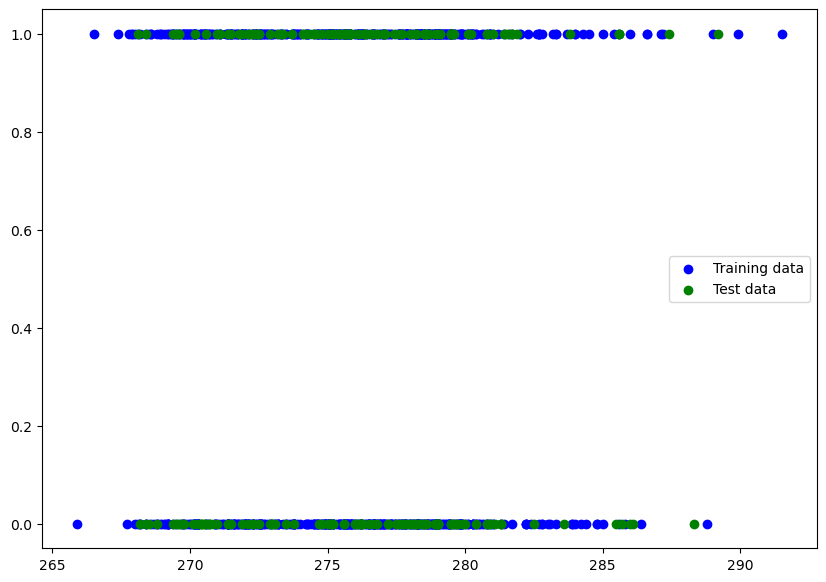

In [579]:
# Visualize the data
plt.figure(figsize=(10, 7))

plt.scatter(X_train['candle_close'], y_train, c="b", label="Training data")

plt.scatter(X_test['candle_close'], y_test, c="g", label="Test data")

# Show a legend
plt.legend(); # Use this semicolon at and to set end

In [580]:
# Normalize data


# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), [
        "Supertrend_Plot",
        "Supertrend_Up_Trend",
        "Supertrend_Down_Trend",
        "SMA_30_MA",
        "SMA_30_Smoothing_Line",
        "SMA_50_MA",
        "SMA_50_Smoothing_Line",
        "SMA_100_MA",
        "SMA_100_Smoothing_Line",
        "SMA_200_MA",
        "SMA_200_Smoothing_Line",
        "EMA_30_EMA",
        "EMA_30_Smoothing_Line",
        "EMA_50_EMA",
        "EMA_50_Smoothing_Line",
        "EMA_100_EMA",
        "EMA_100_Smoothing_Line",
        "EMA_200_EMA",
        "EMA_200_Smoothing_Line",
        "RSI_RSI",
        "RSI_RSIbased_MA",
        "Stochastic_K",
        "Stochastic_D",
        "Bollinger_Bands_Basis",
        "Bollinger_Bands_Upper",
        "Bollinger_Bands_Lower",
        "ATR_ATR",
        "candle_open",
        "candle_close",
        "candle_max",
        "candle_min",
        "candle_volume"]) # turn all values in these columns between 0 and 1
)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)
data_prediction_normal = ct.transform(data_prediction)

In [581]:
X_train.head(1), X_train_normal[0]

(     Supertrend_Plot  Supertrend_Up_Trend  Supertrend_Down_Trend   SMA_30_MA  \
 790            282.7           281.141411          1.000000e+100  281.876667   
 
      SMA_30_Smoothing_Line  SMA_50_MA  SMA_50_Smoothing_Line  SMA_100_MA  \
 790             281.800667    281.774               281.6752     277.184   
 
      SMA_100_Smoothing_Line  SMA_200_MA  ...  Stochastic_D  \
 790                276.9164     273.785  ...     90.076353   
 
      Bollinger_Bands_Basis  Bollinger_Bands_Upper  Bollinger_Bands_Lower  \
 790                282.015             283.343571             280.686429   
 
       ATR_ATR  candle_open  candle_close  candle_max  candle_min  \
 790  0.536196        282.7         282.7       282.8       282.7   
 
      candle_volume  
 790          32.99  
 
 [1 rows x 32 columns],
 array([6.71487603e-01, 1.46203196e-99, 1.00000000e+00, 7.33612527e-01,
        7.28975368e-01, 7.58660912e-01, 7.56725641e-01, 5.12754278e-01,
        4.95540626e-01, 2.64059441e-01, 2.

In [582]:
# Build a neural network model to fit on our normalized data

# tf.random.set_seed(42)

# 1. Create the model (based on insurance_model_2)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(200, name="hidden_layer_1", activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(200, name="hidden_layer_2", activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(80, name="hidden_layer_3", activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, name="last_layer", activation=tf.keras.activations.linear)
], name="model_1")

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001, decay=0.00001 / 200),
                          metrics=["mae"])

# 3. Fit the model
history_training_model_1 = model_1.fit(X_train_normal, y_train, epochs=300, batch_size=4, verbose=0) # 36%
# history_training_model_1 = model_1.fit(X_train_normal, y_train, epochs=600, batch_size=3, verbose=0) # 39.5%
# history_training_model_1 = model_1.fit(X_train_normal, y_train, epochs=200, batch_size=2, verbose=0) # 39.7%
# history_training_model_1 = model_1.fit(X_train_normal, y_train, epochs=100, batch_size=4, verbose=0) # 40.5%
# history_training_model_1 = model_1.fit(X_train_normal, y_train, epochs=4800, batch_size=4, verbose=0) # 36%
# history_training_model_1 = model_1.fit(X_train.to_numpy(), y_train, epochs=800, batch_size=4, verbose=0)

In [583]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (4, 200)                  6600      
                                                                 
 hidden_layer_2 (Dense)      (4, 200)                  40200     
                                                                 
 hidden_layer_3 (Dense)      (4, 80)                   16080     
                                                                 
 last_layer (Dense)          (4, 1)                    81        
                                                                 
Total params: 62,961
Trainable params: 62,961
Non-trainable params: 0
_________________________________________________________________


In [584]:
# plot_model(model_1, show_shapes=True)

In [585]:
# Evaluate our insurance model trained on normalized data

model_1.evaluate(X_test_normal, y_test)
# model_1.evaluate(X_test.to_numpy(), y_test)

7/7 [==============================] - 0s 930us/step - loss: 0.4016 - mae: 0.4016


[0.4015634059906006, 0.4015634059906006]

Text(0.5, 0, 'epochs')

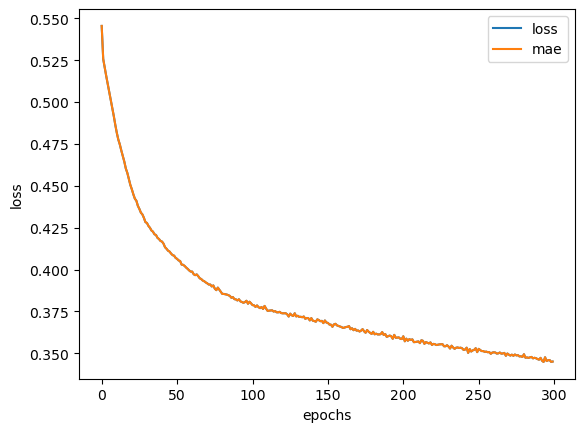

In [586]:
# Plot history (also known as a loss curve or training curve)
pd.DataFrame(history_training_model_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [587]:
# Try and make a prediction using our model
y_pred = model_1.predict(data_prediction_normal)
# y_pred = model_1.predict(data_prediction.to_numpy())
y_pred

1/1 [==============================] - 0s 33ms/step


array([[0.78018886]], dtype=float32)

In [588]:
y_pred[0][0]

0.78018886